# Espectro plano acotado

[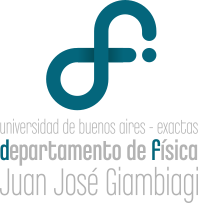](https://www.df.uba.ar/)  

[cc-by-sa-80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES) 
2021 [Víctor A. Bettachini](mailto:bettachini@df.uba.ar)  

---

## Transformada de Fourier
>Referencia:  
Secciones 1.5 y 1.6  
Wave Physics  
Stephen Nettel  
4th ed. Springer, Berlin Heidelberg, 2009.

- **Transformada** ($\mathcal{F}$): Operación sobre $f(x)$
$$
\mathcal{F} f(x) = \hat{f}(\xi) = \int_{-\infty}^{\infty} f(x)\ \operatorname{e}^{-2\pi i x \xi}\,\mathrm{d} x
$$
que la descompone en la contribución de cada frecuencia $\xi$.
$\hat{f}(\xi)$ es la representación en el dominio de la frecuencia de $f(x)$.

- **Anti-transformada** ($\mathcal{F}^{-1}$): Operación inversa que recupera una representación en el dominio de las $x$
$$
f(x) = \mathcal{F}^{-1} \hat{f}(\xi) = \int_{-\infty}^{\infty} \hat{f}(\xi)\ \operatorname{e}^{+2 \pi i x \xi}\,\mathrm{d} \xi
$$

- **Tiempo ($t$) y frecuencia angular ($\omega$)**: Cuando se descompone una función del tiempo $f(t)$, $\xi$ corresponde a $\nu$ y se suele hacer uso del cambio de variable $\omega = 2 \pi \nu$
$$
\mathcal{F} f(t) = \hat{f}(\omega) = \hat{f}(\frac{\omega}{2 \pi}) = \int_{-\infty}^{\infty} f(t) \operatorname{e}^{-i \omega t}\,\mathrm{d} t
$$
y la inversa
$$
f(t) = \mathcal{F}^{-1} \hat{f}(\omega) = \frac{1}{2 \pi} \int_{-\infty}^{\infty} \hat{f}(\omega) \operatorname{e}^{+i \omega t}\,\mathrm{d} \omega,
$$
donde no hay que olvidar el factor $\frac{1}{2 \pi}$ pues no se integró en $\nu$ sino en $\omega$.  
Este factor causa una asimetría entre la transformada y su inversa, que suele salvarse aplicando un factor $\frac{1}{\sqrt{2 \pi}}$ tanto en $\mathcal{F}^{-1}$ como en $\mathcal{F}$ para hacer de esta una operación unitaria ($U^* U = U U^* = I$, preservando el producto interno en un espacio de Hilbert). 
$$
\boxed{
\hat{f}(\omega) = \mathcal{F} f(t) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} f(t) \operatorname{e}^{-i \omega t}\,\mathrm{d} t
} \\
\boxed{
f(t) = \mathcal{F}^{-1} \hat{f}(\omega) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} \hat{f}(\omega) \operatorname{e}^{+i \omega t}\,\mathrm{d} \omega
}.
$$

- **Espectro** Las amplitudes en función de $\omega$ que hay en $f(t)$. Usualmente solo se representa $\left| \hat{f}(\omega) \right|$ pues $\hat{f}(\omega) \in \mathbb{C}$.
- **Posición ($r$) y número de onda ($k$)**
Ídem. $t$ y $\omega$
$$
\boxed{
\hat{f}(k) = \mathcal{F} f(r) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} f(x) \operatorname{e}^{-i k r}\,\mathrm{d} x
} \\
\boxed{
f(r) = \mathcal{F}^{-1} \hat{f}(k) = \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} \hat{f}(k) \operatorname{e}^{+i k r}\,\mathrm{d} k
}.
$$

- **Primitivas útiles**
$$
\int_{-\infty}^{\infty} f(x)\ \operatorname{e}^{-a x^2}\, \mathrm{d} x = \sqrt{ \frac{ \pi }{ a  } }
\qquad 
\int_{-\infty}^{\infty} f(x)\ \cos{(k x)} \operatorname{e}^{-a x^2}\, \mathrm{d} x = \sqrt{ \frac{ \pi }{ a  } } \operatorname{e}^{-\frac{k^2}{4 a}}
\qquad 
\int_{-\infty}^{\infty} f(x)\ \sin{(k x)} \operatorname{e}^{-a x^2}\, \mathrm{d} x = 0
$$

## Enunciado
\\(\hat{\phi }(\omega)\\) en un $\Delta\omega$ centrado en un $\omega_0$ presenta una amplitud constante $\frac{1}{\Delta \omega}$.
En otras $\omega$ es nula.

a) Verifique que el correspondiente $\phi(t) = \mathcal{F}^{-1} \hat{\phi }(\omega)$ está dado por:
  $$
    \phi(t)
    = \frac{1}{\sqrt{2 \pi}} \left[ \frac{ \operatorname{sen}{ \left( \frac{\Delta \omega}{2} t \right) } }{\frac{\Delta \omega}{2} t} \right] \operatorname{e}^{i \omega_0 t}
    = \frac{1}{\sqrt{2 \pi}} \operatorname{senc} \left( \frac{\Delta \omega}{2} t \right) \operatorname{e}^{i \omega_0 t}.
  $$

b) Grafique $\hat{\phi }(\omega)$ y $\left|\phi(t)\right|$.

c) Sea $T$ un tiempo más prolongado que la duración de cualquier experimento que pueda idear.
Muestre que si $\Delta\omega$ es suficientemente pequeño como para que $\Delta\omega T\ll1$, entonces durante un tiempo menor que $T$, $\phi(t)$ es una función armónica de amplitud y fase casi constante.

In [1]:
import sympy as sym
from sympy.physics import mechanics as mech
# mech.init_vprinting() # notación con punto para la velocidad y punto punto para la aceleración
import warnings
warnings.filterwarnings("ignore")

## Verificar transformada 
Hay un rango en que espectro el $\hat{\phi }(\omega)$ presenta la misma amplitud, la inversa del ancho espectral de esta señal $\Delta \omega$ centrado en torno a la frecuencia $\omega_0$.

In [2]:
omega, omega_0 = sym.symbols('omega, omega_0', real=True)
phi_transformada = sym.Function('\hat{\phi }')(omega)
deltaOmega = sym.Symbol('\Delta \omega', positive= True)

Puede escribirse como una función partida.

In [3]:
espectro_partida = sym.Eq(phi_transformada, 
       sym.Piecewise(
           (0, omega < omega_0 - deltaOmega/2),
           (0, omega > omega_0 + deltaOmega/2),
           (1/deltaOmega, True)
       )
      )
espectro_partida

Eq(\hat{\phi }(omega), Piecewise((0, (omega > \Delta \omega/2 + omega_0) | (omega < -\Delta \omega/2 + omega_0)), (1/\Delta \omega, True)))

O haciendo uso de la función de Heaviside
$$
\theta(x-x_0) =
\begin{cases}
1 & x \geq x_0 \\
0 & x < x_0
\end{cases}
$$

In [4]:
espectro_Heaviside = sym.Eq(phi_transformada,
                            1/ deltaOmega* (
                                + sym.Heaviside( omega - ( omega_0 - deltaOmega/2 ) )
                                - sym.Heaviside( omega - ( omega_0 + deltaOmega/2 ) ) 
                            ), evaluate= False
                           )
espectro_Heaviside

Eq(\hat{\phi }(omega), (-Heaviside(-\Delta \omega/2 + omega - omega_0) + Heaviside(\Delta \omega/2 + omega - omega_0))/\Delta \omega)

Lo primero que se nos pide es que verifiquemos el resultado de aplicar la **anti-transformada de Fourier** para obtener la correspondiente función del tiempo.
`Sympy` puede hacer parte de las cuentas.

In [5]:
t = sym.Symbol('t', real= True)
def antiTransformadaFourier(igualdad):
    return (1/sym.sqrt(2* sym.pi))* sym.Integral(igualdad.rhs* sym.exp(sym.I* omega* t), (omega, -sym.oo, sym.oo) )

In [6]:
espectro_antiTransformado_expresión = sym.Eq(
    sym.Function('phi')(t),
    antiTransformadaFourier(espectro_partida)
)
espectro_antiTransformado_expresión

Eq(phi(t), sqrt(2)*Integral(Piecewise((0, (omega > \Delta \omega/2 + omega_0) | (omega < -\Delta \omega/2 + omega_0)), (exp(I*omega*t)/\Delta \omega, True)), (omega, -oo, oo))/(2*sqrt(pi)))

In [7]:
espectro_antiTransformado_expresión.doit()

Eq(phi(t), sqrt(2)*Piecewise((I*exp(I*t*(-\Delta \omega/2 + omega_0))/(\Delta \omega*t) - I*exp(I*t*(\Delta \omega/2 + omega_0))/(\Delta \omega*t), Ne(\Delta \omega*t, 0)), (-(-\Delta \omega/2 + omega_0)/\Delta \omega + (\Delta \omega/2 + omega_0)/\Delta \omega, True))/(2*sqrt(pi)))

Pronto veremos que la expresión para $t \neq 0$ para $t \to 0$ converge al valor $\frac{1}{\sqrt{2 \pi}}$ del resultado para $t=0$.
La solución para $\Delta \omega t \neq 0$

In [8]:
espectro_antiTransformado = espectro_antiTransformado_expresión.doit(conds='none') # ninguna condición = solucion general
espectro_antiTransformado.expand()

Eq(phi(t), -sqrt(2)*I*exp(I*\Delta \omega*t/2)*exp(I*omega_0*t)/(2*sqrt(pi)*\Delta \omega*t) + sqrt(2)*I*exp(-I*\Delta \omega*t/2)*exp(I*omega_0*t)/(2*sqrt(pi)*\Delta \omega*t))

puede trabajarse para llegar a la expresión que obtuvimos manualmente.

In [9]:
factorComún = (1/ (sym.sqrt(2* sym.pi)* deltaOmega* t) )* sym.exp(sym.I* omega_0* t)
espectro_antiTransformado2 = sym.Eq(espectro_antiTransformado.lhs,
                                    espectro_antiTransformado.rhs.expand().collect(factorComún)
                                  )
espectro_antiTransformado2

Eq(phi(t), sqrt(2)*(-I*sqrt(exp(I*\Delta \omega*t)) + I/sqrt(exp(I*\Delta \omega*t)))*exp(I*omega_0*t)/(2*sqrt(pi)*\Delta \omega*t))

La poco felíz expresión entre paréntesis, donde $\sqrt{\mathrm{e}^{i \Delta \omega t}} = \mathrm{e}^{i \frac{\Delta \omega}{2} t}$

In [10]:
espectro_antiTransformado2.rhs.args[5]

-I*sqrt(exp(I*\Delta \omega*t)) + I/sqrt(exp(I*\Delta \omega*t))

es equivalente a $2 \sin(\frac{\Delta \omega}{2} t)$

In [11]:
espectro_antiTransformado3 = sym.Eq(espectro_antiTransformado2.lhs,
                                    espectro_antiTransformado2.rhs.subs(espectro_antiTransformado2.rhs.args[5], 2* sym.sin(deltaOmega* t/ 2))
                                   )
espectro_antiTransformado3

Eq(phi(t), sqrt(2)*exp(I*omega_0*t)*sin(\Delta \omega*t/2)/(sqrt(pi)*\Delta \omega*t))

Aqui hay un candidato a escribirse como $\operatorname{senc}(x) = \frac{\operatorname{sen}(x)}{x}$, ya que

In [12]:
sencx2 = espectro_antiTransformado3.rhs.args[2]\
* espectro_antiTransformado3.rhs.args[3]\
* espectro_antiTransformado3.rhs.args[5]
sencx2

sin(\Delta \omega*t/2)/(\Delta \omega*t)

es $
\frac{1}{2} \operatorname{senc}(\frac{\Delta \omega}{2} t) 
= \frac{1}{2} \frac{\operatorname{sen}(\frac{\Delta \omega}{2} t)}{\frac{\Delta \omega}{2} t}
= \frac{\operatorname{sen}(\frac{\Delta \omega}{2} t)}{\Delta \omega t}
$

In [13]:
espectro_antiTransformado4 = sym.Eq(espectro_antiTransformado3.lhs,
                                    espectro_antiTransformado3.rhs.subs(sencx2, sym.sinc(deltaOmega* t/2)/ 2)
                                   )
espectro_antiTransformado4

Eq(phi(t), sqrt(2)*exp(I*omega_0*t)*sinc(\Delta \omega*t/2)/(2*sqrt(pi)))

Verificamos manualmente este resultado
$$
\begin{aligned}
\phi(t) 
& = \mathcal{F}^{-1} \hat{\phi}(\omega) 
= \frac{1}{\sqrt{2 \pi}} \int_{-\infty}^{\infty} \hat{\phi}(\omega) \operatorname{e}^{i \omega t} \,\mathrm{d} \omega \\
& = \frac{1}{\sqrt{2 \pi}} \int_{\omega_0 -\frac{\Delta \omega}{2}}^{\omega_0 -\frac{\Delta \omega}{2}} \frac{1}{\Delta \omega} \operatorname{e}^{i \omega t} \,\mathrm{d} \omega \\
& = \frac{1}{\sqrt{2 \pi} \Delta \omega} \int_{\omega_0 -\frac{\Delta \omega}{2}}^{\omega_0 + \frac{\Delta \omega}{2}} \operatorname{e}^{i \omega t} \,\mathrm{d} \omega \\
& = \frac{1}{\sqrt{2 \pi} \Delta \omega} \left[ \frac{\operatorname{e}^{i \omega t} }{i t} \right]_{\omega = \omega_0 -\frac{\Delta \omega}{2}}^{\omega = \omega_0 + \frac{\Delta \omega}{2}} \\
& = \frac{1}{\sqrt{2 \pi} ( i \Delta \omega t )} \left[ \operatorname{e}^{i (\omega_0 + \frac{\Delta \omega}{2}) t} - \operatorname{e}^{i (\omega_0 -\frac{\Delta \omega}{2}) t} \right] \\
& = \frac{ \operatorname{e}^{i \omega_0 t} }{\sqrt{2 \pi} } \frac{1}{ i \Delta \omega t} \left[ \operatorname{e}^{i \frac{\Delta \omega}{2} t} - \operatorname{e}^{- i \frac{\Delta \omega}{2} t} \right] \\
& = \frac{ \operatorname{e}^{i \omega_0 t} }{\sqrt{2 \pi} } \frac{1}{2} \left[ \frac{ \left( \cos( \frac{\Delta \omega}{2} t ) + i \sin( \frac{\Delta \omega}{2} t ) \right) - \left( \cos( \frac{\Delta \omega}{2} t ) - i \sin( \frac{\Delta \omega}{2} t ) \right) }{ i \frac{\Delta \omega}{2} t} \right] \\
& = \frac{ \operatorname{e}^{i \omega_0 t} }{\sqrt{2 \pi} } \frac{1}{2} \left[ \frac{ 2 i \sin( \frac{\Delta \omega}{2} t ) }{ i \frac{\Delta \omega}{2} t} \right]
= \frac{ \operatorname{e}^{i \omega_0 t} }{\sqrt{2 \pi} } \frac{ \sin( \frac{\Delta \omega}{2} t ) }{ \frac{\Delta \omega}{2} t }
= \boxed{
   \frac{ \operatorname{e}^{i \omega_0 t} }{\sqrt{2 \pi} } \operatorname{senc}( \frac{\Delta \omega}{2} t )
}.
\end{aligned}
$$
Con lo que cumplimos con lo pedido en el punto a) del problema.
Para entender mejor de que se trata este resultado y su relación con $\hat{\phi}(\omega)$ hay que graficar ambas.

## Graficación $\hat{\phi}(\omega)$

Para graficar elijo unos valores arbitrarios tales que $\omega_0 > \Delta \omega$.

In [14]:
from matplotlib.style import use as meGusta
meGusta('fivethirtyeight') # estilo de gráficos con grilla y letras grandes

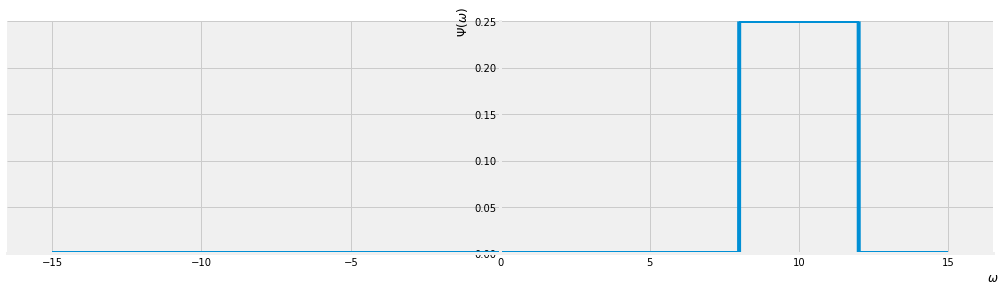

In [15]:
omega_0_v = 10 # [s-1]
deltaOmega_v = 4 # [s-1]
magnitudes_substituir= {
    deltaOmega: deltaOmega_v,
    omega_0 : omega_0_v,
}
espectro_v= espectro_partida.rhs.subs(magnitudes_substituir)
# espectro_v= espectro_Heaviside.rhs.subs(magnitudes_substituir) # con esto da lo mismo, prueben
sym.plot(espectro_v, (omega, -1.5* omega_0_v, 1.5* omega_0_v),
         xlabel='$\omega$', ylabel='$\Psi(\omega)$', ylim=(0, 1/deltaOmega_v), size=(14,4)
        )

## Graficación $\phi(t)$

Recordemos que la $\phi(t)$ la obutuvimos de $\mathcal{F}^{-1} \hat{\phi}(\omega) \in \mathbb{C}$.
Lo observable es la parte real $\operatorname{Re}[\phi(t) ]$.

In [16]:
espectro_antiTransformado_v = espectro_antiTransformado.rhs.subs(magnitudes_substituir) # uso lo que da la integral, todo lo demás fue cosmética
re_espectro_antiTransformado_v = sym.re(espectro_antiTransformado_v)
re_espectro_antiTransformado_v

sqrt(2)*(-sin(8*t)/(4*t) + sin(12*t)/(4*t))/(2*sqrt(pi))

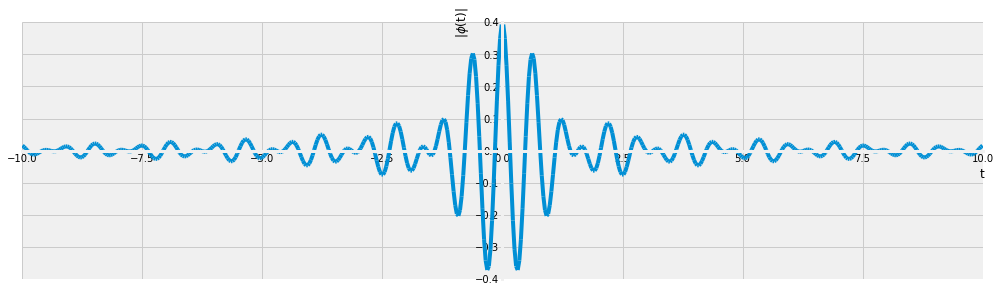

In [17]:
sym.plot(re_espectro_antiTransformado_v,
         xlim=(-10,10), ylim=(-0.4,0.4), ylabel='|$\phi$(t)|',
         size=(14,4), adaptive= False, nb_of_points= 600
        )

Y esta forma desgarbada que tiene el pulso en el tiempo nada tiene que ver con la forma de escribir $\phi(t)$.
Puedo graficar la expresión con $\operatorname{senc}$ que tan solo modula la armónica con $\omega_0$.

In [18]:
espectro_antiTransformado4_v = espectro_antiTransformado4.rhs.subs(magnitudes_substituir) # uso lo que da la integral, todo lo demás fue cosmética
re_espectro_antiTransformado4_v = sym.re(espectro_antiTransformado4_v)
re_espectro_antiTransformado4_v

sqrt(2)*re(exp(10*I*t)*sinc(2*t))/(2*sqrt(pi))

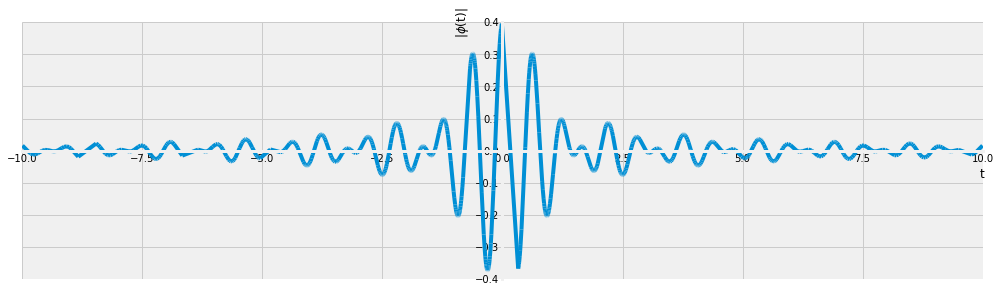

In [19]:
sym.plot(re_espectro_antiTransformado4_v,
         xlim=(-10,10), ylim=(-0.4,0.4), ylabel='|$\phi$(t)|',
         size=(14,4)
        )

## Graficación $|\phi(t)|^2$

Usualmente la portadora tiene una frecuencia mucho mayor que lo que definirá su modulación, $\omega_0 \gg \Delta \omega$.


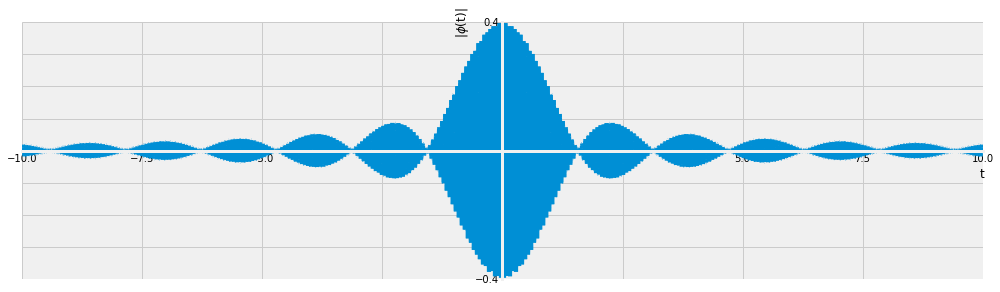

In [43]:
omega_0_v = 100 # [s-1]
deltaOmega_v = 4 # [s-1]
magnitudes_substituir2= {
    deltaOmega: deltaOmega_v,
    omega_0 : omega_0_v,
}
espectro_antiTransformado_v2 = espectro_antiTransformado.rhs.subs(magnitudes_substituir2) # uso lo que da la integral, todo lo demás fue cosmética
sym.plot(sym.re(espectro_antiTransformado_v2),
         xlim=(-10,10), ylim=(-0.4,0.4), ylabel='|$\phi$(t)|',
         size=(14,4), adaptive= False, nb_of_points= 4000
        )

Evidentemente el interés debe ponerse en estudiar la modulación.

Usualmente el parámetro de interés no es el efecto sobre la amplitud de $\phi$ sino en la magnitud que la relacione con la energía.
Como estamos expresando en función del tiempo, $\phi(t)$, tal magnitud se relaciona con la energía por unidad de tiempo, i.e. la **potencia**.
- Potencia de una onda en una cuerda $\propto \psi^2$,
- Intensidad del sonido en un gas $\propto (\delta p)^2$,  
- Potencia de una señal eléctrica $\propto (\Delta V)^2$ siendo $\Delta V$ la diferencia de potencial eléctrico.

Para esto se calcula $\left| \phi(t) \right|^2 = \phi(t)* \overline{\phi(t)}$ y su gráfica responderá a $\operatorname{senc}^2\left(\frac{\Delta \omega t}{2}\right)$.

In [31]:
espectro_antiTransformado_v = espectro_antiTransformado.rhs.subs(magnitudes_substituir) # uso lo que da la integral, todo lo demás fue cosmética
espectro_antiTransformado_v

sqrt(2)*(-I*exp(12*I*t)/(4*t) + I*exp(8*I*t)/(4*t))/(2*sqrt(pi))

In [32]:
espectro_antiTransformado_v.conjugate()

sqrt(2)*(-I*exp(-8*I*t)/(4*t) + I*exp(-12*I*t)/(4*t))/(2*sqrt(pi))

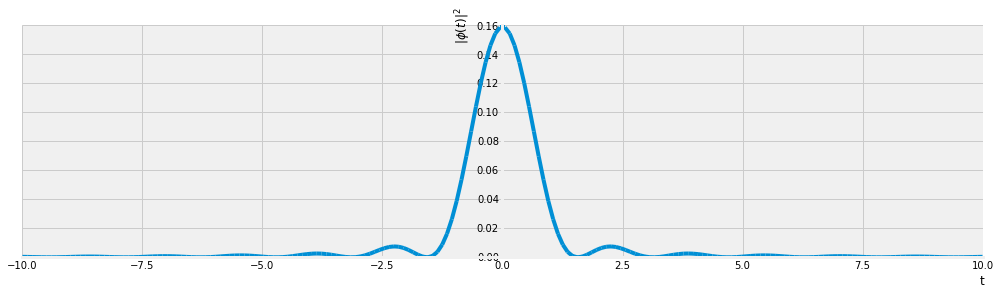

In [47]:
sym.plot(espectro_antiTransformado_v* espectro_antiTransformado_v.conjugate(),
         xlim=(-10,10), ylim=(0,0.16), ylabel='$|\phi(t)|^2$',
         size=(14,4), adaptive= False, nb_of_points= 200
        ) # módulo cuadrado

Hay cosas remarcables a notar:
- La **amplitud** pico es el área del espectro plano, $\frac{1}{\Delta \omega} \times \Delta\omega$, afectada por el factor $\frac{1}{\sqrt{2 \pi} }$.
- Los ceros que limitan la **duración** del lóbulo principal del _senc^2_ son los ceros del _sen^2_ y están dados por $\frac{\Delta \omega}{2} t_0 = \pm \pi \implies t_0 = \pm \frac{2 \pi}{\Delta \omega}$
    - Dentro de los límites de este lóbulo está la **mayor parte de la amplitud (energía)** del pulso.

## Relación $\Delta \omega$ y $T$
Si el rango de tiempo contemplado es muy grande $T \gg 1$ y $\Delta \omega T \ll 1 \implies \Delta \omega \ll 1$, esencialmente el espectro tiende a mostrar un único pico en una $\omega_0$, que como función serepresenta por una delta de dirac modulada por su correspondiente amplitud
$$
\hat{\phi}(\omega) = A_{\omega_0} \delta(\omega_0).
$$
Entonces $\phi(t)= \mathcal{F}^{-1} \hat{\phi}(\omega)$ debe ser una única armónica con esta $\omega_0$ y amplitud $\propto A_{\omega_0}$.

Podemos probar esto analizando en el límite de $\Delta \omega \rightarrow 0$ la expresión de $\phi(t)$ que comprobamos anteriormente
$$
\lim_{\Delta \omega \to 0} \phi(t)
= \lim_{\Delta \omega \to 0} \frac{ \operatorname{e}^{i \omega_0 t} }{\sqrt{2 \pi} } \frac{ \sin( \frac{\Delta \omega}{2} t ) }{ \frac{\Delta \omega}{2} t }
\stackrel{\text{L'H}}{=} \lim_{\Delta \omega \to 0} \frac{ \operatorname{e}^{i \omega_0 t} }{\sqrt{2 \pi} } \frac{\Delta \omega}{2} \frac{ \cos( \frac{\Delta \omega}{2} t ) }{ \frac{\Delta \omega}{2}}
= \frac{ \operatorname{e}^{i \omega_0 t} }{\sqrt{2 \pi} },
$$
que gracias a la regla de L' Hôpital $\stackrel{\text{L'H}}{=}$ vemos que representa **una única armónica de frecuencia $\omega_0$**.

## La (anti)transformada en `Sympy`

In [23]:
antiFourierSympy = sym.integrals.transforms._fourier_transform(espectro_partida.rhs,
                                                               x= omega, k= t, a= 1/(sym.sqrt(2* sym.pi)), b=1,
                                                               name= 'anti-Fourier', simplify=False
                                                              ) # Antitransformada: x = omega (variable integración), b= +1
antiFourierSympy

Piecewise((sqrt(2)*I*exp(I*t*(-\Delta \omega/2 + omega_0))/(2*sqrt(pi)*\Delta \omega*t) - sqrt(2)*I*exp(I*t*(\Delta \omega/2 + omega_0))/(2*sqrt(pi)*\Delta \omega*t), Ne(2*sqrt(pi)*\Delta \omega*t, 0)), (-sqrt(2)*(-\Delta \omega/2 + omega_0)/(2*sqrt(pi)*\Delta \omega) + sqrt(2)*(\Delta \omega/2 + omega_0)/(2*sqrt(pi)*\Delta \omega), True))

In [24]:
antiFourierSympy2 = antiFourierSympy.args[0][0] # con esto elijo el caso $t \neq 0$
antiFourierSympy2

sqrt(2)*I*exp(I*t*(-\Delta \omega/2 + omega_0))/(2*sqrt(pi)*\Delta \omega*t) - sqrt(2)*I*exp(I*t*(\Delta \omega/2 + omega_0))/(2*sqrt(pi)*\Delta \omega*t)

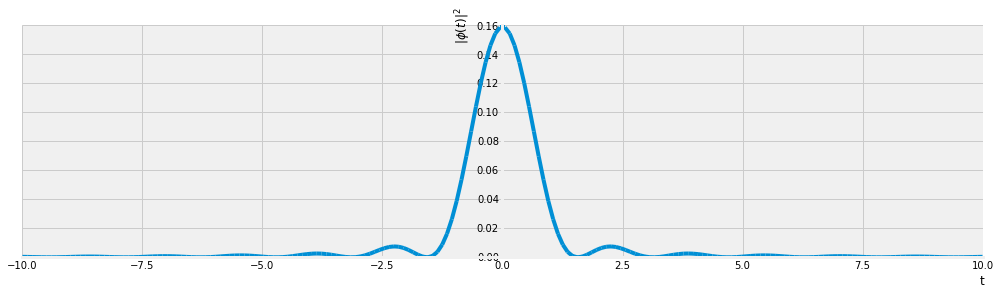

In [50]:
antiFourierSympy_v = antiFourierSympy2.subs(magnitudes_substituir)
sym.plot(sym.Abs(antiFourierSympy_v)**2,
         xlim=(-10,10), ylim=(0,0.16), ylabel='$|\phi(t)|^2$',
         size=(14,4), adaptive= False, nb_of_points= 200
        ) # cuadrado valor absoluto